<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/session-3/Machine_Learning_Process_2021S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical: Quick Run through ML using Scikit-Learn

In this lab, you will be using the Califironia housing Prices dataset to predict the housing price in California.

At the end of the session, you will learn how to:


1.   Perform exploratary data analysis
2.   Perform data preparation
3.   Train and validate model
4.   Fine Tune Model
5.   Evaluate System on Test Set





## Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

## Getting the data

We will be using the California housing Prices dataset.  This dataset was based on data from the 1990 California census.  

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv 



In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

# we can directly fetch the data and convert the csv into a pandas dataframe using the following:
df = pd.read_csv(url)

## Exploratary Data Analysis

As in all Machine Learning project, understanding your data and doing some exploratory data analysis is one of the essential tasks.

**Exercise 1**

Answer the following by completing the code cell below: 

*   What many records (samples) do we have? (Hint: shape)
*   What are the different features we have?  (Hint: describe() method)
*   Are there any missing values? (Hint: info() method)

<details><summary>Click here for answer</summary>

```
print('>>> Check the sample size:')
print(df.shape)
print('>>> Check for the features: ')
print(df.describe())
print('>>> Check for missing values')
print(df.info())
```

</details>


In [ ]:
print('>>> Check the sample size:')
# use shape
print(df.shape)
print('>>> Check for the features: ')
# use describe
print(df.describe())
print('>>> Check for missing values')
# use info
print('>>> Check the sample size:')
print(df.info())

Before we proceed with more data exploration, it is often a good practice for us to first set aside a part of data as dataset as test set, so as to prevent us from snooping information/pattern from the test set and 'overfit' ourselves (and eventually our model) to the test set.

We can either random shuffle the data and split them into train/test split using scikit learn's train_test_split() method, e.g. 

```
train_set, test_set = train_test_split(df, 0.2)
print(len(train_set), 'train', len(test_set), 'test')
```

This is
generally fine if your dataset is large enough (especially relative to the
number of attributes), but if it is not, you run the risk of introducing a
significant sampling bias.  Your train set may not have a representative distribution as your eventual test set or real-world data. 

If based on the domain experts inputs, who feel that income distribution is a key for good prediction, we want to make sure our train and test set has the same income distribution. So we may want to split in such a way that train/test set has same distribution of income categories, e.g. This can be done by stratified sampling.

Before that let's take a closer look at the income distribution using histogram


(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

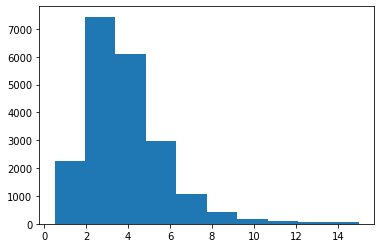

In [ ]:
plt.hist(df.median_income)

most median
income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some
median incomes go far beyond 6. It is important to have a sufficient number
of instances in your dataset for each stratum, or else the estimate of a
stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. 

We can use the pd.cut() to bin the median income into 5 categories (e.g. 0 to 1.5 is cat 1, 1.5 to 3.0 is cat 2, 3.0 to 4.5 is cat 3, 4.5 to 6 is cat 4, and 6 to infinity is cat 5).

### Using Stratified Sampling 

Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata. In stratified random sampling, the strata are formed based on members' shared attributes or characteristics such as income or educational attainment.  The following source shows you how you could use Stratified Sampling to split the data into training and testing set. We use the pd.cut() to bin the median income into 5 categories (e.g. 0 to 1.5 is cat 1, 1.5 to 3.0 is cat 2, 3.0 to 4.5 is cat 3, 4.5 to 6 is cat 4, and 6 to infinity is cat 5).

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df.income_cat.value_counts().sort_index()


**Exercise** 

Now split the data again but using stratified smapling based on the new feature column ['income_cat']

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, shuffle=True, stratify=df['income_cat'])

Measure the income category proportions in the test set generated with random sampling and stratified sampling.  The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

In [ ]:
def income_cat_props(data):
  return data['income_cat'].value_counts()/len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': income_cat_props(df),
    'Stratified': income_cat_props(strat_test_set),
    'Random': income_cat_props(test_set)
}).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

Q2. Creates a histogram and inspect the attributes distribution to look for insights



In [ ]:
import matplotlib.pyplot as plt
# Creates a histogram

In [ ]:
#@title
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np
# random sampling, 80/20 split


In [ ]:
#@title
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), 'train', len(test_set), 'test')

## Discover and Visualize the Data to Gain Insights

Q4. We shall discover and visualize the Data to gain more insights.   Let's create a copy of the housing data so that we can experiment with it without affecting the training set.  Use the copy method to create a new copy of the stratified training data set and creates a scatter plot of all the districts to visualize poppulation density with respect to the longitude and latitude data.

In [ ]:
# scatter plot of all districts

In [ ]:
#@title
housing = strat_train_set.copy()
housing.plot(kind='scatter',  x='longitude', y='latitude', alpha=0.1)

In this scatter plot, we examine the housing prices with the radius of each circle representing the district's poulation (option s) and the color represents the price (option c).  The predefined color map (option cmap) called jet, ranges from blue for low values to red for high values.

In [ ]:
# scatter plot with color map

In [ ]:
#@title
import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population'] / 100, label='population',
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()


### Looking for Correlations

Q5.  Compute the standard correlation coefficient between every pair of attributes using the corr() method, and examine how much each attribute with the median house value

In [ ]:
# compute the standard correlation coefficient


In [ ]:
#@title
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

Another way to check for correlation between attributes is to use scatter_matrix function which plots every numerical attribute against every other numerical attribute.  The most promising attribute the predict the median house value seems to be the median income.  

In [ ]:
# scatter matrix


In [ ]:
#@title
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

Q6.  Creates the scatter plot to show the  correlation of medina_income and median_housing_value, ane examine the visualisation.

In [ ]:
# scatter plot


In [ ]:
#@title
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [ ]:
housing[ (housing['median_house_value'] < 360000) & (housing['median_house_value'] > 340000) ]

### Experimenting with Attribute Combinations
Q7.  Try out various attribute combinations before actually preparing the data for Machine Learning.  Creates these 3 new attributes:


*   rooms per household ( total rooms / households )
*   bedrooms per room (total bedrooms / total rooms)
*   population per house hold (population / households)

And compute the correlation matrix again to examine the correlation between median house values and all the other attributes, including these 3 new attributes.

In [ ]:
# Creates new attributes and compute the correlation matrix



In [ ]:
#@title
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

## Data Cleaning
Q8 There are some missing values within the data set for total_bedroom attribute, fix it by


*   Get rid of the corresponding districts
*   Get rid of the whole attribute
*   Set the values to some value, such as zero, mean or median



In [ ]:
# Data cleaning


In [ ]:
#@title
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
# Get rid of districts with missing values
housing.dropna(subset=['total_bedrooms'])
# Get rid of the attribute
housing.drop('total_bedrooms', axis = 1)
median = housing['total_bedrooms'].median()
# Set the missing values to median 
housing['total_bedrooms'].fillna(median)

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

Scikit Learn provides a handy class to take care of missing values: Imputer. 
* Creates an Imputer instance, specifying that you want to replace the missing attribute's missing values with the median of that attribute.   
* Creates a copy of the data without the text attribute ocean_proximity
*  Fit the imputer instance to the training data using the fit() method:
*  Display the statistics_ instance variable of the imputer object.

In [ ]:
#@title
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)
imputer.statistics_

In [ ]:
#@title
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
housing_tr.loc[sample_incomplete_rows.index.values]

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
encoder.classes_

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

The categorical attribute ocean_proximity was left out because it is a text attribute so we cannot compute its median.  Transform the text categories to integer categories, then from integer categories to one-hot vectors in one shot using the LabelBinarizer class.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

Creates custom transformers to create taks such as combining specific attributes, such as rooms per household, population per household and bedrooms per room.  

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs

Scikit-Learn provides the Pipeline class to help with data transformation steps that need to be executed in the right order.  A full pipeline handling both numerical and categorical attributes may look like this:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

## Select and Train a Mode

Q9. Train a Linear Regression model with the prepared data.

In [ ]:
# Linear Regression model


In [ ]:
#@title
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

Try it out on a few instances from the training set.  It works, but the predictions are not exactly accurate.

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

Q10.  Measure the regression model RMSE on the whole training set using Scikit-Learn's mean_squared_error functions.

In [ ]:
from sklearn.metrics import mean_squared_error



In [ ]:
#@title
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Q11.  Measure the regression model MAE on the whole training set using Scikit-Learn's mean_absolute_error functions

In [ ]:
from sklearn.metrics import mean_absolute_error



In [ ]:
#@title
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

Let's try to use a DecisionTreeRegressor to train the model for comparison purpose.  The model seemed to have badly overfit the data.  

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Evaluation using Cross-Validation

Q12.  Use the cross validation feature to splits the training set into 10 distinct folds, then trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time.  Display the scores using the display_scores function given above.

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [ ]:
from sklearn.model_selection import cross_val_score



In [ ]:
#@title
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Q13. Compute the same scores for the LInear Regression model

In [ ]:
#@title

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

## Model Fine Tuning

One way to fine tune the model is to use Scikit-Learn's GridSearch CV to evaluate all the possible combiniations of hyperparameter values that you want it to experiment with. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:

pd.DataFrame(grid_search.cv_results_)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

## Evaluate System on the Test Set

Q14  Evaluate the final model on the test set.  Use the Linear Regression model for the final testing.

In [ ]:
#@title
final_model = lin_reg

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse